In [1]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
gs3=pd.read_csv("../datasets/3_gs_corrected.csv")
gs3

,Run,DRB1,DRB1.1
0,SRR13280660,DRB1*04:01,DRB1*07:01
1,SRR13280707,DRB1*03:01,DRB1*15:01
2,SRR13280655,DRB1*03:01,DRB1*04:01
3,SRR13280656,DRB1*03:01,DRB1*04:01
4,SRR13280657,DRB1*03:01,DRB1*15:01
...,...,...,...
81,SRR13280738,DRB1*03:01,DRB1*15:01
82,SRR13280677,DRB1*03:01,DRB1*04:01
83,SRR13280737,DRB1*03:01,DRB1*13:01
84,SRR13280667,DRB1*03:01,DRB1*04:01


In [4]:
d3=pd.read_csv("../results/standard/arcas_d3.csv")
d3

,Run,A1,A2,B1,B2,C1,C2,DMA1,DMA2,DMB1,...,DRB1,DRB1.1,E1,E2,F1,F2,H1,H2,K1,K2
0,SRR13280725,A*02:01,A*02:01,B*44:02,B*15:01,C*05:01,C*03:04,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*04:01,DRB1*01:01,E*01:01,E*01:03,F*01:01,F*01:01,H*01:01,H*01:01,K*01:02,K*01:02
1,SRR13280734,A*01:01,A*01:01,B*07:02,B*08:01,C*07:01,C*07:525,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*15:01,DRB1*03:01,E*01:01,E*01:01,F*01:01,F*01:01,NaN,NaN,NaN,NaN
2,SRR13280659,A*01:01,A*02:01,B*51:01,B*08:01,C*07:01,C*14:02,DMA*01:01,DMA*01:01,DMB*01:03,...,DRB1*03:01,DRB1*13:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,NaN,NaN
3,SRR13280707,A*01:01,A*24:02,B*27:05,B*08:01,C*07:01,C*02:02,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*15:01,DRB1*03:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,NaN,NaN
4,SRR13280670,A*01:01,A*03:01,B*08:01,B*15:01,C*07:01,C*03:04,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*04:01,DRB1*03:01,E*01:01,E*01:03,F*01:01,F*01:03,H*02:01,H*02:04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,SRR13280709,A*02:01,A*02:01,B*15:01,B*57:01,C*03:04,C*06:02,DMA*01:01,DMA*01:01,DMB*01:03,...,DRB1*04:01,DRB1*04:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,K*01:02,K*01:02
82,SRR13280675,A*02:01,A*03:01,B*07:02,B*15:01,C*07:02,C*03:03,DMA*01:01,DMA*01:01,DMB*01:01,...,DRB1*14:54,DRB1*04:01,E*01:03,E*01:03,F*01:01,F*01:03,NaN,NaN,K*01:01,K*01:02
83,SRR13280702,A*02:01,A*02:01,B*07:02,B*08:01,C*07:02,C*07:970N,DMA*01:01,DMA*01:02,DMB*01:01,...,DRB1*03:01,DRB1*13:01,E*01:03,E*01:03,F*01:01,F*01:04,NaN,NaN,K*01:02,K*01:02
84,SRR13280686,A*01:01,A*02:01,B*08:01,B*51:01,C*07:01,C*14:02,DMA*01:01,DMA*01:01,DMB*01:03,...,DRB1*03:01,DRB1*13:01,E*01:01,E*01:03,F*01:01,F*01:01,NaN,NaN,K*01:01,K*01:02


In [5]:
#select only DRB1 columns for d3 
d3=d3.set_index(d3.columns[0])
mask = d3.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
d3=d3.loc[: , mask]
d3=d3.reset_index()
d3

,Run,DRB1,DRB1.1
0,SRR13280725,DRB1*04:01,DRB1*01:01
1,SRR13280734,DRB1*15:01,DRB1*03:01
2,SRR13280659,DRB1*03:01,DRB1*13:01
3,SRR13280707,DRB1*15:01,DRB1*03:01
4,SRR13280670,DRB1*04:01,DRB1*03:01
...,...,...,...
81,SRR13280709,DRB1*04:01,DRB1*04:01
82,SRR13280675,DRB1*14:54,DRB1*04:01
83,SRR13280702,DRB1*03:01,DRB1*13:01
84,SRR13280686,DRB1*03:01,DRB1*13:01


In [15]:
test=pd.merge(gs3,d3,on="Run")
test.columns = ['Run', 'DRB1_gs', 'DRB1.1_gs', 'DRB1_arcas','DRB1.1_arcas']
test

,Run,DRB1_gs,DRB1.1_gs,DRB1_arcas,DRB1.1_arcas
0,SRR13280660,DRB1*04:01,DRB1*07:01,DRB1*07:01,DRB1*04:01
1,SRR13280707,DRB1*03:01,DRB1*15:01,DRB1*15:01,DRB1*03:01
2,SRR13280655,DRB1*03:01,DRB1*04:01,DRB1*04:01,DRB1*03:01
3,SRR13280656,DRB1*03:01,DRB1*04:01,DRB1*04:01,DRB1*03:01
4,SRR13280657,DRB1*03:01,DRB1*15:01,DRB1*15:01,DRB1*03:01
...,...,...,...,...,...
81,SRR13280738,DRB1*03:01,DRB1*15:01,DRB1*15:01,DRB1*03:01
82,SRR13280677,DRB1*03:01,DRB1*04:01,DRB1*04:01,DRB1*03:01
83,SRR13280737,DRB1*03:01,DRB1*13:01,DRB1*03:01,DRB1*13:01
84,SRR13280667,DRB1*03:01,DRB1*04:01,DRB1*04:01,DRB1*03:01


In [17]:
pd.DataFrame(test.groupby(['DRB1_gs','DRB1_arcas'])['Run'].count()).sum()

Run    86
dtype: int64

In [6]:
def cleaning_data(dataset1, gold_standard_dataset1):
  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns
  #delete any rows with accession numbers not in gold standard accessions
  #https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
  #https://www.kite.com/python/answers/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series-in-python
  dataset1 = dataset1[dataset1[dataset1_column_names[0]].isin(list(gold_standard_dataset1.iloc[:, 0]))]
  gold_standard_dataset_copy = gold_standard_dataset1
  gold_standard_dataset1 = gold_standard_dataset1[gold_standard_dataset1[gs_columns_names[0]].isin(list(dataset1.iloc[:, 0]))]


  #sort rows based on accession 
  #https://datatofish.com/sort-pandas-dataframe/
  dataset1.sort_values(by=[dataset1_column_names[0]], inplace=True)
  gold_standard_dataset1.sort_values(by=[gs_columns_names[0]], inplace=True)

  #https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/
  dataset1.reset_index(inplace = True,drop = True)
  gold_standard_dataset1.reset_index(inplace = True,drop = True)

  #https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
  #https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
  #https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python
  #https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
  #formatting dataframes to look alike

  for i in range(1,len(dataset1_column_names)):
    dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  for j in range(1,len(gs_columns_names)):
    gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  return dataset1, gold_standard_dataset1


In [7]:
def create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name):
  
  #fill each dict with allele and the number of times it was mispredicted

  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns

  #make a list or dictionary for each HLA gene (A, B, C)
  DRB1_1,DRB1_2 = pd.DataFrame, pd.DataFrame

  #Outer left Join exclusive
  #https://www.youtube.com/watch?v=iYWKfUOtGaw
  #https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
  #https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns?rq=1
  #https://stackoverflow.com/questions/50543326/how-to-do-left-outer-join-exclusion-in-pandas
  #A= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1],dataset1_column_names[2]]],left_on=[gs_columns_names[1],gs_columns_names[2]], right_on = [dataset1_column_names[1],dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"')
  #https://stackoverflow.com/questions/61720614/how-to-drop-merge-column-in-pandas-merge
  DRB1_1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1]]],left_on=[gs_columns_names[1]], right_on = [dataset1_column_names[1]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  DRB1_2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[2]]],left_on=[gs_columns_names[2]], right_on = [dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)

  #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

  '''
  A,B,C = pd.DataFrame, pd.DataFrame, pd.DataFrame
  A= pd.merge(A1,A2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  B= pd.merge(B1,B2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  C= pd.merge(C1,C2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  '''

  #allels_missed = missed_allels(A1,A2,B1,B2,C1,C2)
  #return misread_gene_count, allels_missed
  return DRB1_1,DRB1_2

  #pd.series  then series to list 

In [8]:
def misreadsbyallele(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  DRB1_1 = dataframe_list[0]
  DRB1_2 = dataframe_list[1]
  misreadsDRB1=[*DRB1_1['DRB1'].tolist(), *DRB1_2['DRB1.1'].tolist()]
  print(misreadsDRB1)
  DRB1_allels = collections.Counter(misreadsDRB1)
  return DRB1_allels

In [10]:
def misreadsbygene(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  DRB1_1 = dataframe_list[0]
  DRB1_2 = dataframe_list[1]

  drb1=len(DRB1_1)+len(DRB1_2)
  return drb1



In [11]:
def misread_gene_plot(misreads_dict):
  df = pd.DataFrame.from_dict(misreads_dict, orient='index', dtype=None, columns=['DRB1'])
  print(df)
  print(type(df))
  return df

In [34]:
# MAIN - load required data
loc_gs = '../datasets'
gold_standard_dataset1 = pd.read_csv(loc_gs+'/3_gs_corrected.csv')
tool_names_and_loc = dict()
how_many_tools = int(input("How many tools regarding dataset1 would you like to input"))
for i in range(how_many_tools):
  caller = input("what is filepath to caller results csv") #/content/gdrive/MyDrive/test/OPTITYPE/optitype.csv /content/gdrive/MyDrive/test/phlat.csv
  tool_name = input("what is the name of this tool").lower()
  tool_names_and_loc[tool_name]=caller

#names = dict()
#all_data = list()

#print(all_data)


In [36]:
misreadsbygene_dict

{'hlaforest': 0}

           DRB1
hlaforest     0
<class 'pandas.core.frame.DataFrame'>
['hlaforest']


/tmp/ipykernel_848/1790296161.py:28: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
/tmp/ipykernel_848/1790296161.py:30: FutureWarning: The default value of regex will change from True to False in a future version.
  gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')


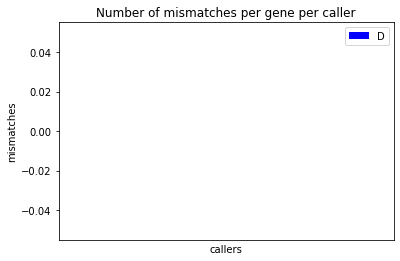

In [35]:
# MAIN - misreads by gene graph
misreadsbygene_dict = dict()
alltools = list()

for key,value in tool_names_and_loc.items():
  dataset1 = pd.read_csv(value)
  dataset1=dataset1.set_index(dataset1.columns[0])
  mask = dataset1.apply(lambda col: col.str.contains('DRB1').any(),
                axis=0)
  dataset1=dataset1.loc[: , mask]
  dataset1=dataset1.reset_index()
  datasets_cleaned=cleaning_data(dataset1, gold_standard_dataset1)
  dataset1=datasets_cleaned[0]
  gold_standard_dataset1=datasets_cleaned[1]
  alltools.append(key)

  misreadsbygene_dict[key] = misreadsbygene(dataset1, gold_standard_dataset1, key)
  '''
  dataset1 = dataframes[0]
  gold_standard_dataset1 = dataframes[1]
  misread_genes=gene_misread(dataset1, gold_standard_dataset1, tool_name)
  all_data.append(misread_genes)
  '''

df = misread_gene_plot(misreadsbygene_dict)
print(alltools)
df['tools']=np.array(alltools)
#https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/
#https://stackoverflow.com/questions/51865367/cannot-convert-the-series-to-class-int
DRB1= df['DRB1'].astype(int).to_list()
X = df['tools']

#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
#https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
x = np.arange(len(X))
ax = plt.subplot(111)
ax.bar(x-0.2, DRB1, width=0.2, color='b', align='center')

plt.xticks(x, X)
plt.xlabel("callers")
plt.ylabel("mismatches")
plt.title("Number of mismatches per gene per caller")
plt.legend((('DRB1')))
plt.show()

#df.to_csv('misreadsbygene.csv', index=False)
#categorical_data = sns.load_dataset('/content/misreadsbygene.csv')


In [23]:
df

,DRB1,tools
hlaforest,0,hlaforest
